# House Price Of Tehran 

## Import Libraries

In [1]:
# Importing pandas library for data manipulation
import pandas as pd

# Importing numpy library for mathematical operations
import numpy as np

# Importing matplotlib.pyplot library for plotting graphs
import matplotlib.pyplot as plt

# Importing seaborn library for creating beautiful and complex plots
import seaborn as sns

# Importing matplotlib.pyplot again (this is redundant and unnecessary)
import matplotlib.pyplot as plt


## Reading Csv File

In [2]:
# Reading the data from a CSV file into a pandas DataFrame
df = pd.read_csv("housePrice.csv")

## sampling of data

In [3]:
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67


In [114]:
# Displaying the first 5 rows of the DataFrame to get a preview of the data
df.head(5)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [5]:
# Displaying the last 5 rows of the DataFrame to get a preview of the data
df.tail()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67
3478,82,2,False,True,True,Parand,3.600000e+08,12000.00


In [6]:
# Displaying 5 random rows from the DataFrame for a quick sample of the data
df.sample(5)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
2514,93,2,False,True,True,Gisha,3.600000e+09,120000.00
1308,65,1,True,True,False,Punak,2.250000e+09,75000.00
2273,66,2,True,True,False,Punak,2.650000e+09,88333.33
2170,240,4,True,True,True,Persian Gulf Martyrs Lake,4.800000e+09,160000.00
199,124,3,True,True,True,Pirouzi,3.968000e+09,132266.67


## Analyze and change the column types

In [4]:
# Displaying the data types of all columns in the DataFrame
df.dtypes

Area           object
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
dtype: object

In [9]:
# Displaying the column names of the DataFrame
df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price',
       'Price(USD)'],
      dtype='object')

In [10]:
# Removing commas and extra spaces, then changing the 'Area' column type from object to integer
df['Area'] = df['Area'].str.replace(",", "").str.strip().astype("int")

# Display the 'Area' column after the change
df['Area']


0        63
1        60
2        79
3        95
4       123
       ... 
3474     86
3475     83
3476     75
3477    105
3478     82
Name: Area, Length: 3479, dtype: int64

In [11]:
df.dtypes

Area            int64
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
dtype: object

## Add a column  for Price per square meter of the house

In [12]:
# Creating a new column 'Price(1milion_T)' by converting the 'Price' column to millions
df["Price(1milion_T)"] = df['Price'] / 1e6

# Creating a new column 'Price(per square meter)' by dividing 'Price(1milion_T)' by 'Area'
df["Price(per square meter)"] = df["Price(1milion_T)"] / df['Area']

# Dropping the 'Price' and 'Price(USD)' columns from the DataFrame
df.drop(["Price", "Price(USD)"], axis=1, inplace=True)

# Displaying the updated DataFrame
df


,Area,Room,Parking,Warehouse,Elevator,Address,Price(1milion_T),Price(per square meter)
0,63,1,True,True,True,Shahran,1850.0,29.365079
1,60,1,True,True,True,Shahran,1850.0,30.833333
2,79,2,True,True,True,Pardis,550.0,6.962025
3,95,2,True,True,True,Shahrake Qods,902.5,9.500000
4,123,2,True,True,True,Shahrake Gharb,7000.0,56.910569
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3500.0,40.697674
3475,83,2,True,True,True,Niavaran,6800.0,81.927711
3476,75,2,False,False,False,Parand,365.0,4.866667
3477,105,2,True,True,True,Dorous,5600.0,53.333333


## Describe of data

In [13]:
# Generating summary statistics for numerical columns in the DataFrame
df.describe()

,Area,Room,Price(1milion_T),Price(per square meter)
count,3.479000e+03,3479.000000,3479.000000,3479.000000
mean,8.744000e+06,2.079908,5359.022711,41.102290
std,3.167266e+08,0.758275,8099.934524,31.622472
min,3.000000e+01,0.000000,3.600000,0.000001
25%,6.900000e+01,2.000000,1418.250000,20.000000
50%,9.000000e+01,2.000000,2900.000000,34.545455
75%,1.200000e+02,2.000000,6000.000000,54.826762
max,1.616000e+10,5.000000,92400.000000,416.666667


In [14]:
# Displaying a concise summary of the DataFrame, including the number of non-null entries and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     3479 non-null   int64  
 1   Room                     3479 non-null   int64  
 2   Parking                  3479 non-null   bool   
 3   Warehouse                3479 non-null   bool   
 4   Elevator                 3479 non-null   bool   
 5   Address                  3456 non-null   object 
 6   Price(1milion_T)         3479 non-null   float64
 7   Price(per square meter)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(2), object(1)
memory usage: 146.2+ KB


In [15]:
# Generating summary statistics for numeric columns (both integers and floats), transposing the result,
# and applying a green gradient style to the columns for better visualization
df.describe(include=["int", "float"]).T.style.background_gradient(cmap="Greens", axis=1)

,count,mean,std,min,25%,50%,75%,max
Area,3479.000000,8743999.835585,316726628.816517,30.000000,69.000000,90.000000,120.000000,16160000000.000000
Room,3479.000000,2.079908,0.758275,0.000000,2.000000,2.000000,2.000000,5.000000
Price(1milion_T),3479.000000,5359.022711,8099.934524,3.600000,1418.250000,2900.000000,6000.000000,92400.000000
Price(per square meter),3479.000000,41.102290,31.622472,0.000001,20.000000,34.545455,54.826762,416.666667


The maximum "Area" feature is equal to 16160000000 (probably this feature has outlier values ​​that we should check and remove)

In [16]:
# Filtering the DataFrame to show rows where the 'Area' is greater than 1000
df[df['Area'] > 1000]

,Area,Room,Parking,Warehouse,Elevator,Address,Price(1milion_T),Price(per square meter)
570,3310000000,2,True,True,True,Ostad Moein,3310.0,0.000001
709,16160000000,3,True,True,True,Pasdaran,16160.0,0.000001
1604,8400000000,2,True,True,True,Gheitarieh,8700.0,0.000001
2171,3600,2,False,False,False,Shahryar,9720.0,2.700000
2802,2550000000,2,True,True,True,Central Janatabad,2550.0,0.000001


In [17]:
# Dropping rows where the 'Area' column is greater than 1000 from the DataFrame
df.drop(df[df['Area'] > 1000].index, inplace=True)

In [18]:
# Generating summary statistics for numerical columns (int and float types),
# transposing the result, and applying a green gradient style to highlight the columns for better visualization
df.describe(include=["int", "float"]).T.style.background_gradient(cmap="Greens", axis=1)

,count,mean,std,min,25%,50%,75%,max
Area,3474.000000,107.031664,70.991973,30.000000,69.000000,90.000000,120.000000,1000.000000
Room,3474.000000,2.079735,0.758655,0.000000,2.000000,2.000000,2.000000,5.000000
Price(1milion_T),3474.000000,5355.094994,8102.938841,3.600000,1415.625000,2885.850000,6000.000000,92400.000000
Price(per square meter),3474.000000,41.160670,31.607699,0.022500,20.000000,34.615385,54.886148,416.666667


In [19]:
# Generating summary statistics for categorical (object) and boolean columns in the DataFrame
df.describe(include=["object", "boolean"])

,Parking,Warehouse,Elevator,Address
count,3474,3474,3474,3451
unique,2,2,2,192
top,True,True,True,Punak
freq,2946,3178,2735,161


## mising value 

In [20]:
# Printing the message and then calculating the number of missing values in each column of the DataFrame
print("The number of missing values in dataset: ")
df.isna().sum()

# The 'address' column has a missing value


The number of missing values in dataset: 


Area                        0
Room                        0
Parking                     0
Warehouse                   0
Elevator                    0
Address                    23
Price(1milion_T)            0
Price(per square meter)     0
dtype: int64

In [21]:
# Dropping rows where the 'Address' column has missing values from the DataFrame
df.dropna(subset="Address", inplace=True)

## Remove Duplicated

In [22]:
# Removing duplicate rows from the DataFrame
df = df.drop_duplicates()

## Top 20 Most Expensive Addresses by Price per Square Meter 🏡💰

In [23]:
# Grouping the DataFrame by 'Address' and calculating the average 'Price(per square meter)' for each address,
# sorting the values in descending order, and selecting the top 20 addresses
top_addresses = df.groupby("Address", observed=True)["Price(per square meter)"].mean().sort_values(ascending=False).head(20)

# Converting the index of the top_addresses series to 'object' type
top_addresses.index.astype("object")


Index(['Gandhi', 'Vanak', 'Lavasan', 'Zaferanieh', 'Elahieh', 'Velenjak',
       'Kamranieh', 'Niavaran', 'Farmanieh', 'Aqdasieh', 'Ajudaniye',
       'Mahmoudieh', 'Shahrake Gharb', 'Argentina', 'Dorous', 'Dezashib',
       'Gheitarieh', 'Hekmat', 'Tajrish', 'Mirdamad'],
      dtype='object', name='Address')

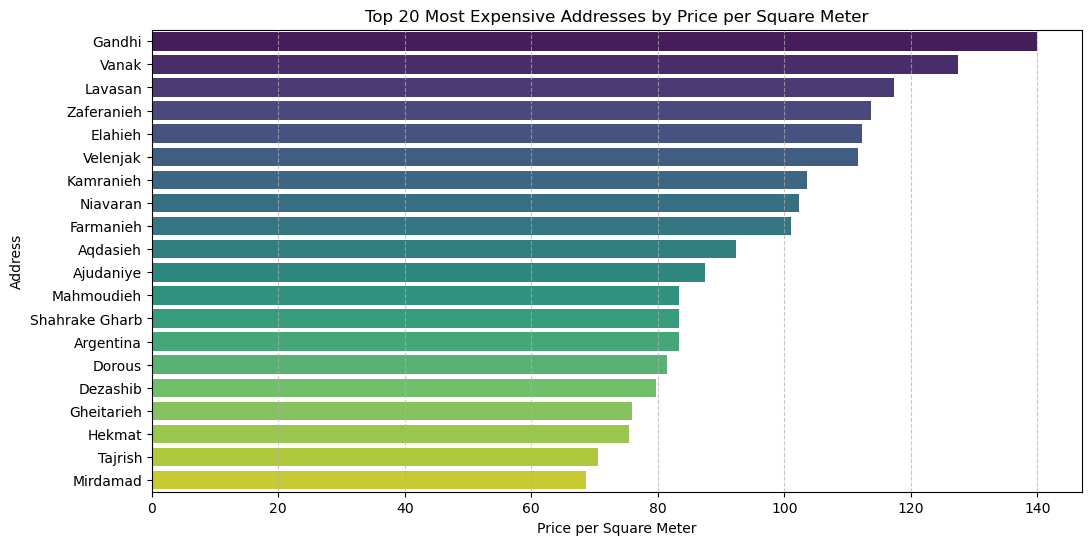

In [24]:
# Setting the figure size for the plot
plt.figure(figsize=(12, 6))

# Creating a horizontal bar plot using seaborn to visualize the top 20 most expensive addresses by price per square meter
sns.barplot(x=top_addresses.values, y=top_addresses.index, palette="viridis", orient='h', hue=top_addresses.index)

# Labeling the x-axis, y-axis, and adding a title to the plot
plt.xlabel("Price per Square Meter")
plt.ylabel("Address")
plt.title("Top 20 Most Expensive Addresses by Price per Square Meter")

# Adding a grid to the x-axis for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Displaying the plot
plt.show()


##  20 cheapest addresses based on the price per square meter 🏡💰

In [25]:
# Grouping the DataFrame by 'Address' and calculating the average 'Price(per square meter)' for each address,
# sorting the values in ascending order, and selecting the top 20 addresses with the lowest price per square meter
lowest_addresses = df.groupby("Address", observed=True)["Price(per square meter)"].mean().sort_values().head(20)

# Displaying the 20 addresses with the lowest average price per square meter
lowest_addresses


Address
Malard                4.166667
Pishva                4.458333
Varamin - Beheshti    4.666667
Robat Karim           5.507102
Shahedshahr           5.654070
Firoozkooh            6.103896
Parand                6.190705
Vahidiyeh             6.523256
Salehabad             6.818182
Pakdasht              7.230014
Shahrake Madaen       7.476636
Hassan Abad           7.846154
Chardangeh            8.000000
Pardis                8.083085
Ghiyamdasht           8.205128
Absard                8.252525
Baghestan             8.273030
Firoozkooh Kuhsar     8.720930
Qarchak               8.795313
Shahrake Quds         9.011486
Name: Price(per square meter), dtype: float64

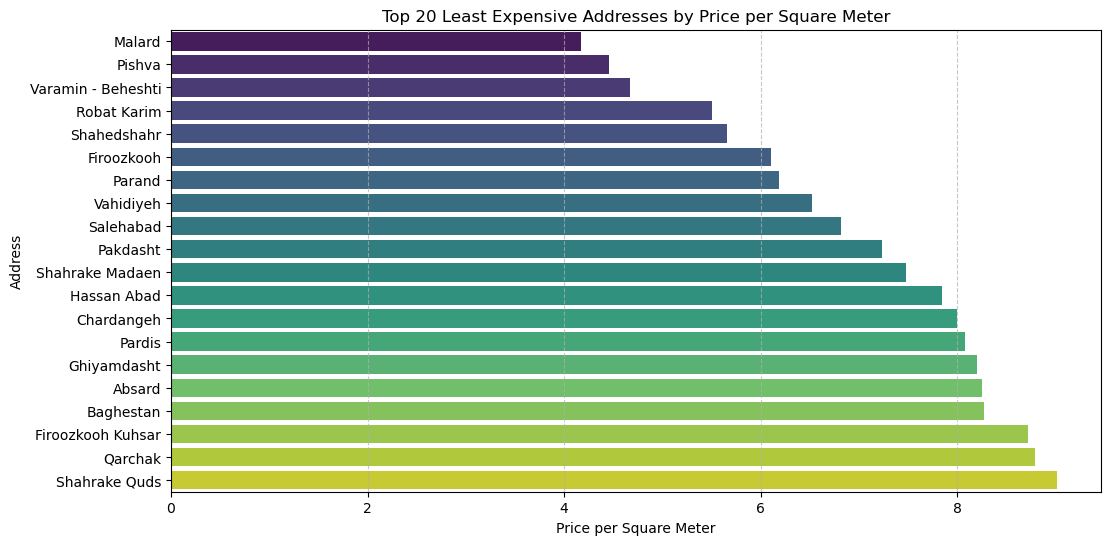

In [26]:
# Setting the figure size for the plot
plt.figure(figsize=(12, 6))

# Creating a horizontal bar plot using seaborn to visualize the top 20 least expensive addresses by price per square meter
sns.barplot(x=lowest_addresses.values, y=lowest_addresses.index, palette="viridis", hue=lowest_addresses.index, legend=False)

# Labeling the x-axis, y-axis, and adding a title to the plot
plt.xlabel("Price per Square Meter")
plt.ylabel("Address")
plt.title("Top 20 Least Expensive Addresses by Price per Square Meter")

# Adding a grid to the x-axis for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Displaying the plot
plt.show()


## Availability of Facilities in Properties

In [27]:
# Calculating the percentage of properties with each facility ('Parking', 'Warehouse', 'Elevator') in the dataset
facilities = (df[['Parking', 'Warehouse', 'Elevator']].sum() / len(df) * 100).round()

# Calculating the percentage distribution of different room numbers in the dataset
room_number = (df["Room"].value_counts() / len(df)) * 100


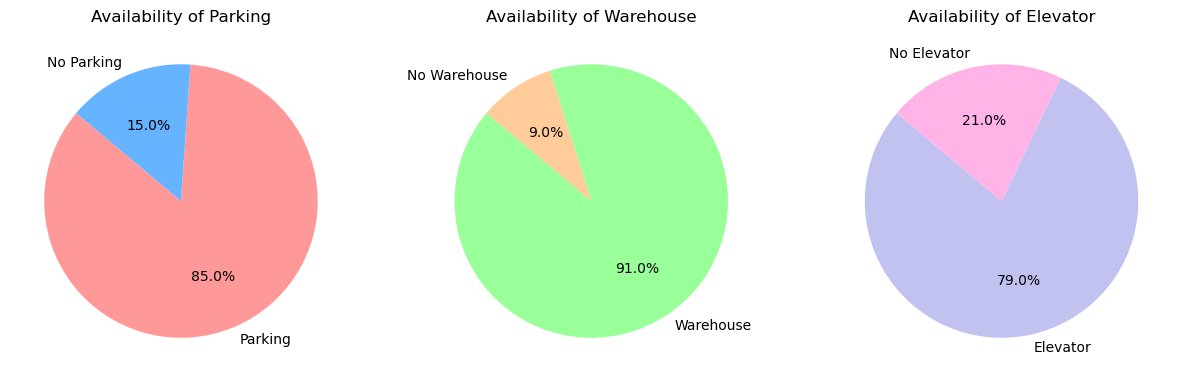

In [28]:
# Defining custom colors for the pie charts
colors = [["#ff9999", "#66b3ff"], ["#99ff99", "#ffcc99"], ["#c2c2f0", "#ffb3e6"]]

# Creating a subplot with 3 pie charts
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Looping through the facilities and creating a pie chart for each one
for i, col in enumerate(facilities.index):
    axes[i].pie([facilities[col], 100 - facilities[col]], labels=[col, "No " + col], autopct='%1.1f%%', 
                colors=colors[i], startangle=140)
    axes[i].set_title(f"Availability of {col}")

# This part seems redundant as it's repeating the loop for the last facility
# axes[i].pie([facilities[col], 100 - facilities[col]], labels=[col, "No " + col], autopct='%1.1f%%', colors=colors[i], startangle=140)
# axes[i].set_title(f"Availability of {col}")

# Displaying the pie charts
plt.show()


In [138]:
room_number = ((df["Room"].value_counts()/len(df))* 100).round()

Room
2    56.0
3    21.0
1    19.0
4     2.0
5     1.0
0     0.0
Name: count, dtype: float64

In [29]:
# Calculating the percentage of each room number in the dataset
room_number = ((df["Room"].value_counts() / len(df)) * 100).round()

# Setting a threshold for the minimum percentage to display individually
threshold = 5

# Keeping only room numbers that have a percentage greater than or equal to the threshold
room_number_filtered = room_number[room_number >= threshold]

# Calculating the sum of percentages for room numbers less than the threshold
other_percentage = room_number[room_number < threshold].sum()

# If the percentage of 'Other' room numbers is greater than 0, adding it to the filtered results
if other_percentage > 0:
    room_number_filtered["Other"] = other_percentage


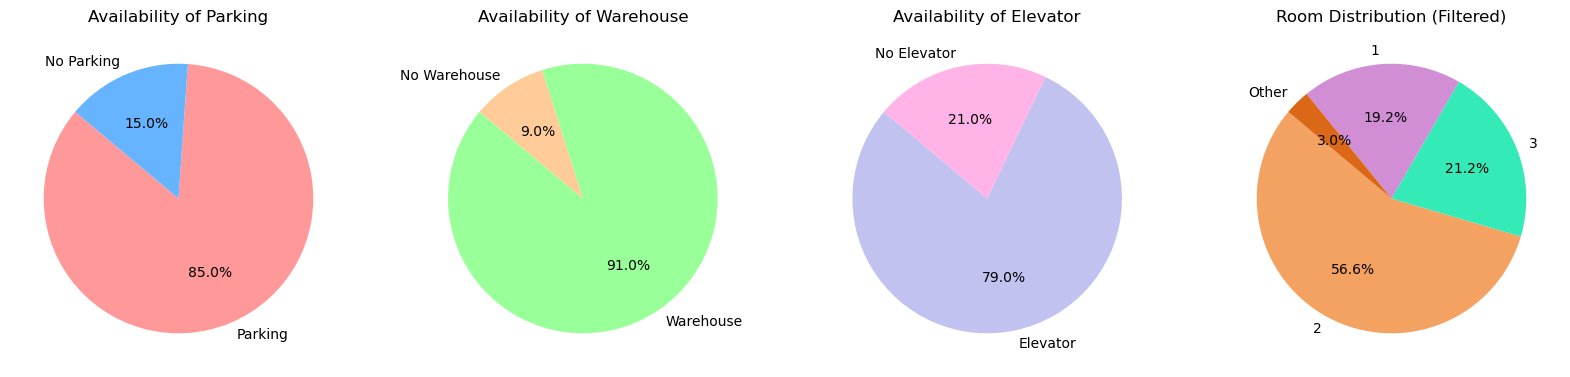

In [30]:
# Defining custom colors for the pie charts
colors = [["#ff9999", "#66b3ff"], ["#99ff99", "#ffcc99"], ["#c2c2f0", "#ffb3e6"], ["#f4a261", "#34ebb7", "#d18ed4", "#db6816"]]

# Creating a subplot with 4 pie charts
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Looping through the facilities and creating a pie chart for each one
for i, col in enumerate(facilities.index):
    axes[i].pie([facilities[col], 100 - facilities[col]], labels=[col, "No " + col], autopct='%1.1f%%', 
                colors=colors[i], startangle=140)
    axes[i].set_title(f"Availability of {col}")

# Creating a pie chart for the filtered room distribution (those with percentages >= 5%)
axes[3].pie(room_number_filtered.values, labels=room_number_filtered.index, autopct='%1.1f%%', 
            colors=colors[3], startangle=140)
axes[3].set_title("Room Distribution (Filtered)")

# Displaying the pie charts
plt.show()



---